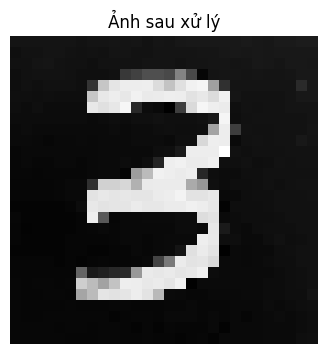

Ảnh đã chuyển thành MNIST-style và lưu tại: ./pixels_28x28.csv


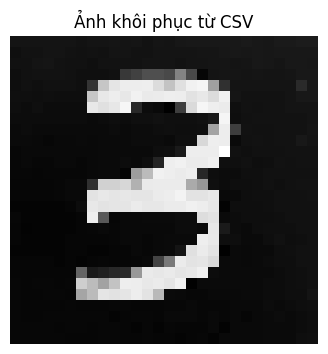

1/1 [==============================] - 0s 75ms/step
Xác định: 3 (Độ chính xác: 100.00%)


In [5]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model

# 1. Load mô hình đã huấn luyện
model_path = "./mnist_digit_model.h5"
model = load_model(model_path, safe_mode=False)

# 2. Đọc ảnh từ file
image_path = "./data/3.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise FileNotFoundError(f"Không tìm thấy ảnh tại: {image_path}")

# 3. Resize ảnh về 28x28 (giống định dạng MNIST)
image_resized = cv2.resize(image, (28, 28), interpolation=cv2.INTER_LINEAR)

# 4. Đảo ngược màu để thành nền đen - chữ trắng (nếu cần)
image_processed = 255 - image_resized

# 5. Hiển thị ảnh sau xử lý
plt.figure(figsize=(4, 4))
plt.imshow(image_processed, cmap="gray")
plt.title("Ảnh sau xử lý")
plt.axis("off")
plt.show()

# 6. Chuyển ảnh đã xử lý thành mảng 1D (28x28 → 784 columns)
image_flatten = image_processed.flatten().reshape(1, -1)  # Biến thành 1 hàng

# 7. Tạo DataFrame với header từ 0 đến 783
columns = [str(i) for i in range(784)]
df = pd.DataFrame(image_flatten, columns=columns)

# 8. Lưu thành file CSV
csv_path = "./pixels_28x28.csv"
df.to_csv(csv_path, index=False)

print(f"Ảnh đã chuyển thành MNIST-style và lưu tại: {csv_path}")

# 9. Đọc lại file CSV
df_loaded = pd.read_csv(csv_path)

# 10. Chuyển DataFrame thành mảng numpy (28x28)
image_loaded = df_loaded.to_numpy().reshape(28, 28)

# 11. Hiển thị ảnh khôi phục từ CSV
plt.figure(figsize=(4, 4))
plt.imshow(image_loaded, cmap="gray")
plt.title("Ảnh khôi phục từ CSV")
plt.axis("off")
plt.show()

# 12. Chuẩn bị input cho mô hình: reshape và normalize
image_input = image_loaded.astype("float32").reshape(1, 28, 28, 1) / 255.0

# 13. Dự đoán số
predictions = model.predict(image_input)
predicted_label = np.argmax(predictions)
confidence = np.max(predictions) * 100

# 14. In kết quả dự đoán
print(f"Xác định: {predicted_label} (Độ chính xác: {confidence:.2f}%)")
